In [1]:
import pandas as pd
import numpy as np

In [3]:
movie = pd.read_csv("IMDB-Movie-Data.csv")

In [4]:
# 1、判断是否有缺失值
pd.isnull(movie)

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
995,False,False,False,False,False,False,False,False,False,False,True,False
996,False,False,False,False,False,False,False,False,False,False,False,False
997,False,False,False,False,False,False,False,False,False,False,False,False
998,False,False,False,False,False,False,False,False,False,False,True,False


In [5]:
np.any(pd.isnull(movie))  # 返回True，说明数据中存在缺失值

True

In [6]:
np.all(pd.isnull(movie))  # 返回False，说明数据中存在缺失值

False

In [7]:
pd.isnull(movie).any()

Rank                  False
Title                 False
Genre                 False
Description           False
Director              False
Actors                False
Year                  False
Runtime (Minutes)     False
Rating                False
Votes                 False
Revenue (Millions)     True
Metascore              True
dtype: bool

In [8]:
pd.notnull(movie).all()

Rank                   True
Title                  True
Genre                  True
Description            True
Director               True
Actors                 True
Year                   True
Runtime (Minutes)      True
Rating                 True
Votes                  True
Revenue (Millions)    False
Metascore             False
dtype: bool

In [9]:
# 2、缺失值处理
# 方法一、删除含有缺失值的样本
data1 = movie.dropna()

In [10]:
pd.notnull(data1).all()

Rank                  True
Title                 True
Genre                 True
Description           True
Director              True
Actors                True
Year                  True
Runtime (Minutes)     True
Rating                True
Votes                 True
Revenue (Millions)    True
Metascore             True
dtype: bool

In [11]:
# 方法二、替换
movie.head()

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0
1,2,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0
2,3,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0
3,4,Sing,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0
4,5,Suicide Squad,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02,40.0


In [12]:
# 含有缺失值的字段
# Revenue (Millions)    False
# Metascore             False
movie["Revenue (Millions)"].fillna(movie["Revenue (Millions)"].mean(),inplace=True)
movie["Metascore"].fillna(movie["Metascore"].mean(),inplace=True)

In [13]:
pd.notnull(movie).all() # 缺失值处理完毕，不存在缺失值

Rank                  True
Title                 True
Genre                 True
Description           True
Director              True
Actors                True
Year                  True
Runtime (Minutes)     True
Rating                True
Votes                 True
Revenue (Millions)    True
Metascore             True
dtype: bool

### 不是缺失值nan，有默认标记的

In [15]:
# 读取数据
path = "https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/breast-cancer-wisconsin.data"
name = ["Sample code number", "Clump Thickness", "Uniformity of Cell Size", "Uniformity of Cell Shape", "Marginal Adhesion", "Single Epithelial Cell Size", "Bare Nuclei", "Bland Chromatin", "Normal Nucleoli", "Mitoses", "Class"]
data = pd.read_csv(path,names=name)

URLError: <urlopen error [WinError 10060] 由于连接方在一段时间后没有正确答复或连接的主机没有反应，连接尝试失败。>

In [ ]:
data.head()

In [25]:
# 1、替换
data_new = data.replace(to_replace="?",value=np.nan)

In [26]:
data_new.head()

,Sample code number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [27]:
# 2、删除缺失值
data_new.dropna(inplace=True)

In [28]:
data_new.isnull().any()

Sample code number             False
Clump Thickness                False
Uniformity of Cell Size        False
Uniformity of Cell Shape       False
Marginal Adhesion              False
Single Epithelial Cell Size    False
Bare Nuclei                    False
Bland Chromatin                False
Normal Nucleoli                False
Mitoses                        False
Class                          False
dtype: bool

## 实现数据的离散化

In [16]:
# 1）准备数据
data = pd.Series([165,174,160,180,159,163,192,184], index=['No1:165', 'No2:174','No3:160', 'No4:180', 'No5:159', 'No6:163', 'No7:192', 'No8:184']) 

In [17]:
data

No1:165    165
No2:174    174
No3:160    160
No4:180    180
No5:159    159
No6:163    163
No7:192    192
No8:184    184
dtype: int64

In [18]:
# 2）、分组
# 自动分组
sr = pd.qcut(data,3)

In [19]:
sr

No1:165      (163.667, 178.0]
No2:174      (163.667, 178.0]
No3:160    (158.999, 163.667]
No4:180        (178.0, 192.0]
No5:159    (158.999, 163.667]
No6:163    (158.999, 163.667]
No7:192        (178.0, 192.0]
No8:184        (178.0, 192.0]
dtype: category
Categories (3, interval[float64]): [(158.999, 163.667] < (163.667, 178.0] < (178.0, 192.0]]

In [20]:
# 3）、转换为one-hot编码
pd.get_dummies(sr,prefix="height")

,"height_(158.999, 163.667]","height_(163.667, 178.0]","height_(178.0, 192.0]"
No1:165,0,1,0
No2:174,0,1,0
No3:160,1,0,0
No4:180,0,0,1
No5:159,1,0,0
No6:163,1,0,0
No7:192,0,0,1
No8:184,0,0,1


In [21]:
# 自定义分组
bins = [150, 165, 180, 195]
sr1 = pd.cut(data,bins)

In [22]:
sr1

No1:165    (150, 165]
No2:174    (165, 180]
No3:160    (150, 165]
No4:180    (165, 180]
No5:159    (150, 165]
No6:163    (150, 165]
No7:192    (180, 195]
No8:184    (180, 195]
dtype: category
Categories (3, interval[int64]): [(150, 165] < (165, 180] < (180, 195]]

In [23]:
pd.get_dummies(sr1,prefix="height")

,"height_(150, 165]","height_(165, 180]","height_(180, 195]"
No1:165,1,0,0
No2:174,0,1,0
No3:160,1,0,0
No4:180,0,1,0
No5:159,1,0,0
No6:163,1,0,0
No7:192,0,0,1
No8:184,0,0,1


### pd.concat合并

In [26]:
##  处理好的one-hot编码与元数据合并
stock = pd.read_csv("stock_day.csv")
p_change = stock["p_change"]

In [27]:
stock.head()

,open,high,close,low,volume,price_change,p_change,ma5,ma10,ma20,v_ma5,v_ma10,v_ma20,turnover
2018-02-27,23.53,25.88,24.16,23.53,95578.03,0.63,2.68,22.942,22.142,22.875,53782.64,46738.65,55576.11,2.39
2018-02-26,22.80,23.78,23.53,22.80,60985.11,0.69,3.02,22.406,21.955,22.942,40827.52,42736.34,56007.50,1.53
2018-02-23,22.88,23.37,22.82,22.71,52914.01,0.54,2.42,21.938,21.929,23.022,35119.58,41871.97,56372.85,1.32
2018-02-22,22.25,22.76,22.28,22.02,36105.01,0.36,1.64,21.446,21.909,23.137,35397.58,39904.78,60149.60,0.90
2018-02-14,21.49,21.99,21.92,21.48,23331.04,0.44,2.05,21.366,21.923,23.253,33590.21,42935.74,61716.11,0.58


In [28]:
sr.value_counts()
stock_change = pd.get_dummies(sr,prefix="rise")

In [29]:
stock_change

,"rise_(158.999, 163.667]","rise_(163.667, 178.0]","rise_(178.0, 192.0]"
No1:165,0,1,0
No2:174,0,1,0
No3:160,1,0,0
No4:180,0,0,1
No5:159,1,0,0
No6:163,1,0,0
No7:192,0,0,1
No8:184,0,0,1


### pd.merge实现合并

In [30]:
left = pd.DataFrame({'key1': ['K0', 'K0', 'K1', 'K2'],
                        'key2': ['K0', 'K1', 'K0', 'K1'],
                        'A': ['A0', 'A1', 'A2', 'A3'],
                        'B': ['B0', 'B1', 'B2', 'B3']})

right = pd.DataFrame({'key1': ['K0', 'K1', 'K1', 'K2'],
                        'key2': ['K0', 'K0', 'K0', 'K0'],
                        'C': ['C0', 'C1', 'C2', 'C3'],
                        'D': ['D0', 'D1', 'D2', 'D3']})

In [31]:
left

,key1,key2,A,B
0,K0,K0,A0,B0
1,K0,K1,A1,B1
2,K1,K0,A2,B2
3,K2,K1,A3,B3


In [32]:
right

,key1,key2,C,D
0,K0,K0,C0,D0
1,K1,K0,C1,D1
2,K1,K0,C2,D2
3,K2,K0,C3,D3


In [33]:
pd.merge(left,right,how="inner",on=["key1","key2"])

,key1,key2,A,B,C,D
0,K0,K0,A0,B0,C0,D0
1,K1,K0,A2,B2,C1,D1
2,K1,K0,A2,B2,C2,D2


In [34]:
pd.merge(left,right,how="left",on=["key1","key2"])

,key1,key2,A,B,C,D
0,K0,K0,A0,B0,C0,D0
1,K0,K1,A1,B1,NaN,NaN
2,K1,K0,A2,B2,C1,D1
3,K1,K0,A2,B2,C2,D2
4,K2,K1,A3,B3,NaN,NaN


In [35]:
pd.merge(left, right, how="right", on=["key1", "key2"])

,key1,key2,A,B,C,D
0,K0,K0,A0,B0,C0,D0
1,K1,K0,A2,B2,C1,D1
2,K1,K0,A2,B2,C2,D2
3,K2,K0,NaN,NaN,C3,D3


In [36]:
pd.merge(left, right, how="outer", on=["key1", "key2"])

,key1,key2,A,B,C,D
0,K0,K0,A0,B0,C0,D0
1,K0,K1,A1,B1,NaN,NaN
2,K1,K0,A2,B2,C1,D1
3,K1,K0,A2,B2,C2,D2
4,K2,K1,A3,B3,NaN,NaN
5,K2,K0,NaN,NaN,C3,D3


## 交叉表与透视表

### 使用crosstab（交叉表）实现

In [40]:
# pd.crosstab(星期数据列，涨跌幅数据列)
stock.index

Index(['2018-02-27', '2018-02-26', '2018-02-23', '2018-02-22', '2018-02-14',
       '2018-02-13', '2018-02-12', '2018-02-09', '2018-02-08', '2018-02-07',
       ...
       '2015-03-13', '2015-03-12', '2015-03-11', '2015-03-10', '2015-03-09',
       '2015-03-06', '2015-03-05', '2015-03-04', '2015-03-03', '2015-03-02'],
      dtype='object', length=643)

In [42]:
# pandas日期类型
data = pd.to_datetime(stock.index)

In [46]:
data.weekday

Int64Index([1, 0, 4, 3, 2, 1, 0, 4, 3, 2,
            ...
            4, 3, 2, 1, 0, 4, 3, 2, 1, 0],
           dtype='int64', length=643)

In [47]:
# 准备星期数据列
stock["week"]=data.weekday

In [48]:
# 准备涨跌幅数据
stock["pona"] = np.where(stock["p_change"]>0,1,0)

In [49]:
stock

,open,high,close,low,volume,price_change,p_change,ma5,ma10,ma20,v_ma5,v_ma10,v_ma20,turnover,week,pona
2018-02-27,23.53,25.88,24.16,23.53,95578.03,0.63,2.68,22.942,22.142,22.875,53782.64,46738.65,55576.11,2.39,1,1
2018-02-26,22.80,23.78,23.53,22.80,60985.11,0.69,3.02,22.406,21.955,22.942,40827.52,42736.34,56007.50,1.53,0,1
2018-02-23,22.88,23.37,22.82,22.71,52914.01,0.54,2.42,21.938,21.929,23.022,35119.58,41871.97,56372.85,1.32,4,1
2018-02-22,22.25,22.76,22.28,22.02,36105.01,0.36,1.64,21.446,21.909,23.137,35397.58,39904.78,60149.60,0.90,3,1
2018-02-14,21.49,21.99,21.92,21.48,23331.04,0.44,2.05,21.366,21.923,23.253,33590.21,42935.74,61716.11,0.58,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2015-03-06,13.17,14.48,14.28,13.13,179831.72,1.12,8.51,13.112,13.112,13.112,115090.18,115090.18,115090.18,6.16,4,1
2015-03-05,12.88,13.45,13.16,12.87,93180.39,0.26,2.02,12.820,12.820,12.820,98904.79,98904.79,98904.79,3.19,3,1
2015-03-04,12.80,12.92,12.90,12.61,67075.44,0.20,1.57,12.707,12.707,12.707,100812.93,100812.93,100812.93,2.30,2,1
2015-03-03,12.52,13.06,12.70,12.52,139071.61,0.18,1.44,12.610,12.610,12.610,117681.67,117681.67,117681.67,4.76,1,1


In [51]:
# 交叉表
data = pd.crosstab(stock["week"],stock["pona"])

<AxesSubplot:xlabel='week'>

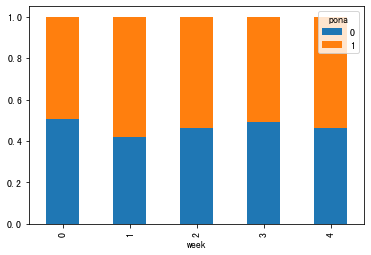

In [60]:
data.div(data.sum(axis=1),axis=0).plot(kind="bar",stacked=True)

pona,0,1
week,,
0,63,62
1,55,76
2,61,71
3,63,65
4,59,68


### 透视表

In [61]:
stock.pivot_table(["pona"], index=["week"])

,pona
week,
0,0.496000
1,0.580153
2,0.537879
3,0.507812
4,0.535433


## 分组与聚合

In [62]:
col =pd.DataFrame({'color': ['white','red','green','red','green'], 'object': ['pen','pencil','pencil','ashtray','pen'],'price1':[5.56,4.20,1.30,0.56,2.75],'price2':[4.75,4.12,1.60,0.75,3.15]})

In [63]:
col

,color,object,price1,price2
0,white,pen,5.56,4.75
1,red,pencil,4.20,4.12
2,green,pencil,1.30,1.60
3,red,ashtray,0.56,0.75
4,green,pen,2.75,3.15


In [67]:
# 对颜色进行分组，对price1进行聚合
# 用DataFrame
col.groupby(by="color")["price1"].max()

color
green    2.75
red      4.20
white    5.56
Name: price1, dtype: float64

In [68]:
# 用serise
col["price1"].groupby(col["color"]).max()

color
green    2.75
red      4.20
white    5.56
Name: price1, dtype: float64

### 星巴克零售店铺数据案例

In [71]:
# 1、准备数据
starbucks = pd.read_csv("directory.csv")

In [72]:
starbucks.head()

,Brand,Store Number,Store Name,Ownership Type,Street Address,City,State/Province,Country,Postcode,Phone Number,Timezone,Longitude,Latitude
0,Starbucks,47370-257954,"Meritxell, 96",Licensed,"Av. Meritxell, 96",Andorra la Vella,7,AD,AD500,376818720,GMT+1:00 Europe/Andorra,1.53,42.51
1,Starbucks,22331-212325,Ajman Drive Thru,Licensed,"1 Street 69, Al Jarf",Ajman,AJ,AE,NaN,NaN,GMT+04:00 Asia/Dubai,55.47,25.42
2,Starbucks,47089-256771,Dana Mall,Licensed,Sheikh Khalifa Bin Zayed St.,Ajman,AJ,AE,NaN,NaN,GMT+04:00 Asia/Dubai,55.47,25.39
3,Starbucks,22126-218024,Twofour 54,Licensed,Al Salam Street,Abu Dhabi,AZ,AE,NaN,NaN,GMT+04:00 Asia/Dubai,54.38,24.48
4,Starbucks,17127-178586,Al Ain Tower,Licensed,"Khaldiya Area, Abu Dhabi Island",Abu Dhabi,AZ,AE,NaN,NaN,GMT+04:00 Asia/Dubai,54.54,24.51


<AxesSubplot:xlabel='Country'>

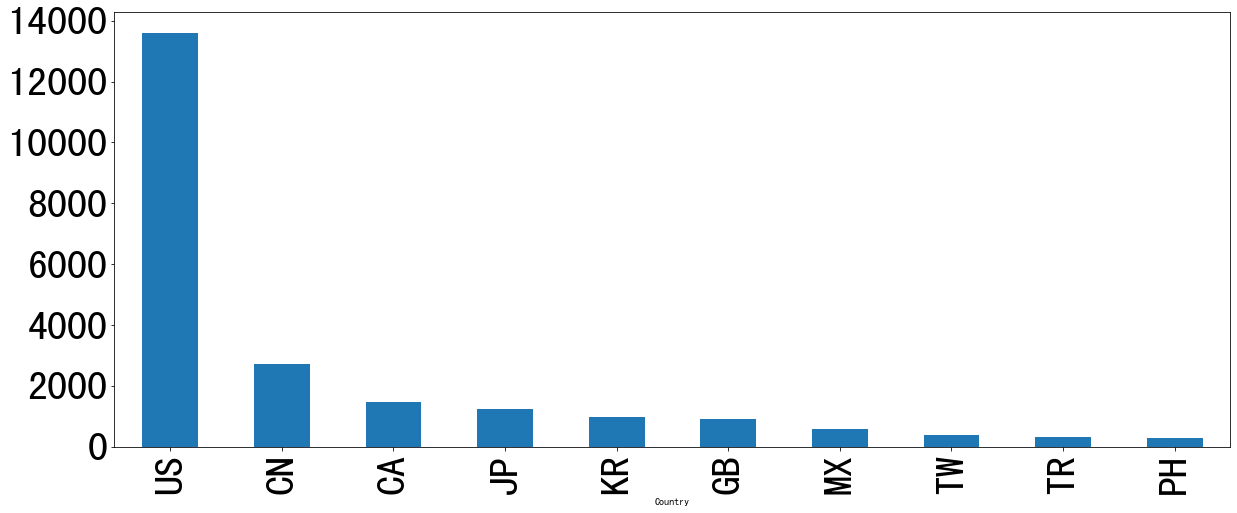

In [75]:
# 按国家进行分组，求出每个国家星巴克店铺数量
starbucks.groupby("Country").count()["Brand"].sort_values(ascending=False)[:10].plot(kind="bar",figsize=(20,8),fontsize=40)

In [76]:
starbucks.groupby(by=["Country","State/Province"]).count()

Brand  Store Number  Store Name  Ownership Type  \
Country State/Province                                                    
AD      7                   1             1           1               1   
AE      AJ                  2             2           2               2   
        AZ                 48            48          48              48   
        DU                 82            82          82              82   
        FU                  2             2           2               2   
...                       ...           ...         ...             ...   
US      WV                 25            25          25              25   
        WY                 23            23          23              23   
VN      HN                  6             6           6               6   
        SG                 19            19          19              19   
ZA      GT                  3             3           3               3   

                        Street Address  City  Postcode  Phone Number  \
Country State/Province                                                 
AD      7                            1     1         1             1   
AE      AJ                           2     2         0             0   
        AZ                          48    48         7            20   
        DU                          82    82        16            50   
        FU                           2     2         1             0   
...                                ...   ...       ...           ...   
US      WV                          25    25        25            23   
        WY                          23    23        23            22   
VN      HN                           6     6         6             6   
        SG                          19    19        19            17   
ZA      GT                           3     3         3             2   

                        Timezone  Longitude  Latitude  
Country State/Province                                 
AD      7                      1          1         1  
AE      AJ                     2          2         2  
        AZ                    48         48        48  
        DU                    82         82        82  
        FU                     2          2         2  
...                          ...        ...       ...  
US      WV                    25         25        25  
        WY                    23         23        23  
VN      HN                     6          6         6  
        SG                    19         19        19  
ZA      GT                     3          3         3  

[545 rows x 11 columns]

### 综合案例

In [77]:
movie = pd.read_csv("IMDB-Movie-Data.csv")

In [78]:
movie

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0
1,2,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0
2,3,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0
3,4,Sing,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0
4,5,Suicide Squad,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02,40.0
...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,Secret in Their Eyes,"Crime,Drama,Mystery","A tight-knit team of rising investigators, alo...",Billy Ray,"Chiwetel Ejiofor, Nicole Kidman, Julia Roberts...",2015,111,6.2,27585,NaN,45.0
996,997,Hostel: Part II,Horror,Three American college students studying abroa...,Eli Roth,"Lauren German, Heather Matarazzo, Bijou Philli...",2007,94,5.5,73152,17.54,46.0
997,998,Step Up 2: The Streets,"Drama,Music,Romance",Romantic sparks occur between two dance studen...,Jon M. Chu,"Robert Hoffman, Briana Evigan, Cassie Ventura,...",2008,98,6.2,70699,58.01,50.0
998,999,Search Party,"Adventure,Comedy",A pair of friends embark on a mission to reuni...,Scot Armstrong,"Adam Pally, T.J. Miller, Thomas Middleditch,Sh...",2014,93,5.6,4881,NaN,22.0


In [79]:
#电影数据中评分的平均分，导演的人数等信息，我们应该怎么获取?
#评分的平均分
movie["Rating"].mean()

6.723199999999999

In [82]:
# 导演的人数
np.unique(movie["Director"]).size

644

<AxesSubplot:ylabel='Frequency'>

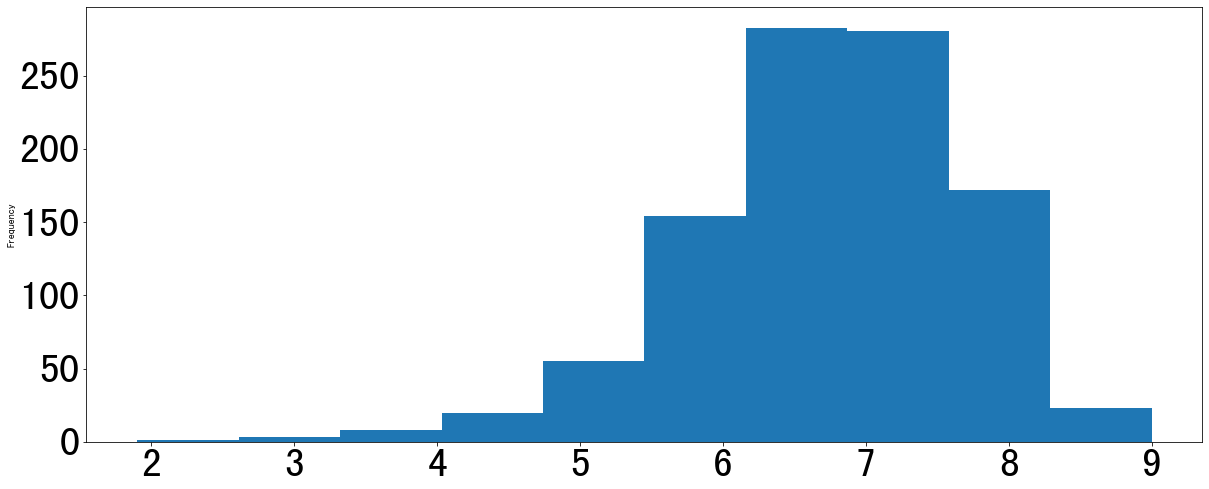

In [84]:
# 问题2︰对于这一组电影数据，如果我们想rating，runtime的分布情况，应该如何呈现数据?
movie["Rating"].plot(kind="hist",figsize=(20,8),fontsize=40)

In [85]:
# 问题3:对于这一组电影数据，如果我们希望统计电影分类(genre)的情况，应该如何处理数据?
# 先统计电影类型有哪些
movie_genre = [i.split(",") for i in movie["Genre"]]

In [86]:
movie_genre

[['Action', 'Adventure', 'Sci-Fi'],
 ['Adventure', 'Mystery', 'Sci-Fi'],
 ['Horror', 'Thriller'],
 ['Animation', 'Comedy', 'Family'],
 ['Action', 'Adventure', 'Fantasy'],
 ['Action', 'Adventure', 'Fantasy'],
 ['Comedy', 'Drama', 'Music'],
 ['Comedy'],
 ['Action', 'Adventure', 'Biography'],
 ['Adventure', 'Drama', 'Romance'],
 ['Adventure', 'Family', 'Fantasy'],
 ['Biography', 'Drama', 'History'],
 ['Action', 'Adventure', 'Sci-Fi'],
 ['Animation', 'Adventure', 'Comedy'],
 ['Action', 'Comedy', 'Drama'],
 ['Animation', 'Adventure', 'Comedy'],
 ['Biography', 'Drama', 'History'],
 ['Action', 'Thriller'],
 ['Biography', 'Drama'],
 ['Drama', 'Mystery', 'Sci-Fi'],
 ['Adventure', 'Drama', 'Thriller'],
 ['Drama'],
 ['Crime', 'Drama', 'Horror'],
 ['Animation', 'Adventure', 'Comedy'],
 ['Action', 'Adventure', 'Sci-Fi'],
 ['Comedy'],
 ['Action', 'Adventure', 'Drama'],
 ['Horror', 'Thriller'],
 ['Comedy'],
 ['Action', 'Adventure', 'Drama'],
 ['Comedy'],
 ['Drama', 'Thriller'],
 ['Action', 'Adventure

In [90]:
movie_class = np.unique([j for i in movie_genre for j in i])

In [92]:
len(movie_class)

20

In [94]:
# 统计每个类别有几个电影
count = pd.DataFrame(np.zeros(shape=[1000,20],dtype="int32"),columns=movie_class)

In [95]:
count

,Action,Adventure,Animation,Biography,Comedy,Crime,Drama,Family,Fantasy,History,Horror,Music,Musical,Mystery,Romance,Sci-Fi,Sport,Thriller,War,Western
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
996,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
997,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
998,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [96]:
# 计数填表
for i in range(1000):
    count.loc[i,movie_genre[i]]=1

<AxesSubplot:>

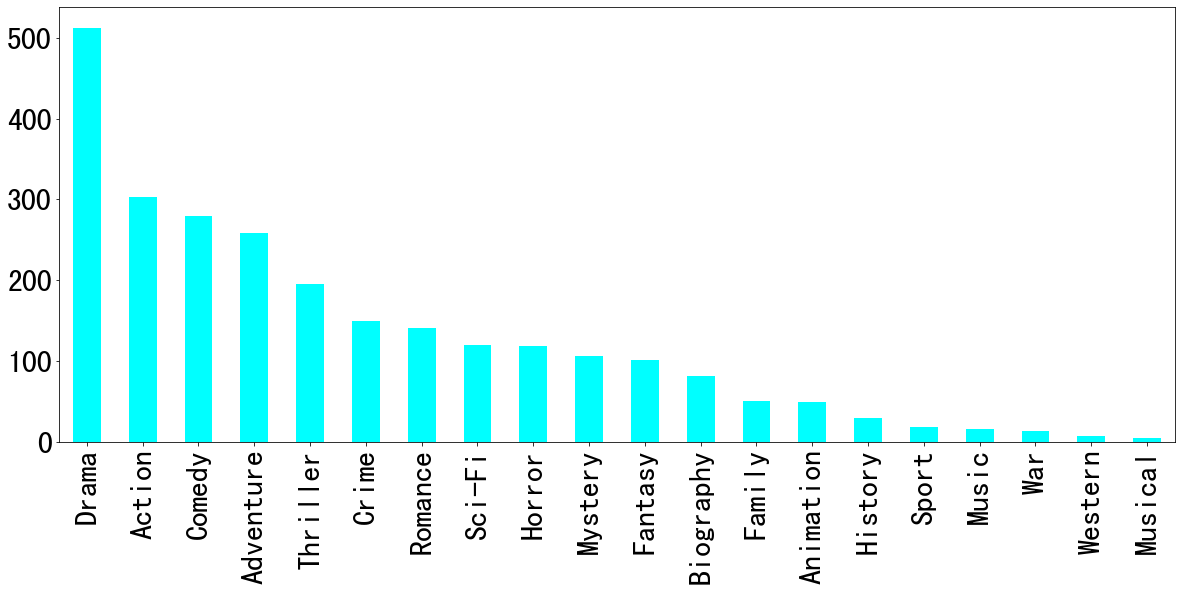

In [103]:
count.sum(axis=0).sort_values(ascending=False).plot(kind="bar",figsize=(20,8),fontsize=30,colormap="cool")